param_num: 273410
[0, 1.9872461954752605, 3.974492390950521, 5.961738586425781, 7.948984781901042, 9.936230977376303, 11.923477172851562, 13.910723368326822, 15.897969563802082, 17.885215759277344, 19.872461954752605, 21.859708150227867, 23.84695434570313, 25.83420054117839, 27.82144673665365, 29.808692932128913, 31.795939127604175, 33.78318532307944, 35.770431518554695]
param_num: 3173890
[0, 23.49310557047526, 46.98621114095052, 70.47931671142578, 93.97242228190105, 117.46552785237631, 140.95863342285156, 164.4517389933268, 187.94484456380206, 211.43795013427732, 234.93105570475257, 258.42416127522785, 281.9172668457031, 305.4103724161784, 328.9034779866537, 352.39658355712896, 375.88968912760424, 399.3827946980795, 422.8759002685548, 446.3690058390301, 469.86211140950536, 493.35521697998064, 516.8483225504559, 540.3414281209311, 563.8345336914064, 587.3276392618816, 610.8207448323568, 634.313850402832, 657.8069559733073, 681.3000615437825, 704.7931671142577, 728.2862726847329, 751.7

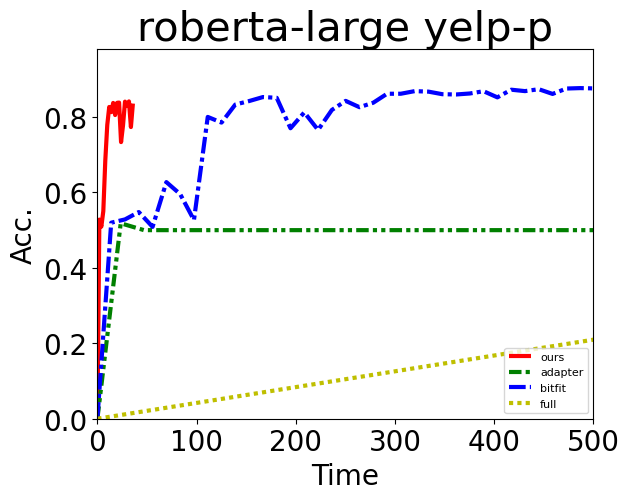

In [1]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np


dataset = "yelp-p"
model = "roberta-large"

logging_file = {
    "ours":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yelp-p/fedFwd_roberta-large_yelp-p_lr0.01_client_num_1000_numerical.log",
    "adapter":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yelp-p/fedsgd_roberta-large_yelp-p_lr0.01_client_num_10_adapter.log",
    "bitfit":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yelp-p/fedsgd_roberta-large_yelp-p_lr0.01_client_num_10_bitfit.log",
    "full":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yelp-p/fedsgd_roberta-large_yelp-p_lr0.01_client_num_10_full.log"
}

train_time_dict = {"ours":1,"adapter":12,"bitfit":12,"full":20}
local_data_num_dict = {"agnews":15,"yahoo":18,"yelp-p":65}
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 

eval_frequence = 5 if dataset == "yahoo" else 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3

def round_to_time(round,eval_frequence,comm_time,method,local_data_num,adhoc=None):
    train_time = train_time_dict[method]
    if adhoc == None:
        adhoc = [1,1,1]
    else:
        adhoc = list(map(int,adhoc.split(",")))
    time_list = [0]
    if method == "ours":
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    else:
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    time_list.append(time)
    for i in range(2,round):
        v_num = adhoc[i-1] if i-1 < len(adhoc) else adhoc[-1]
        if method == "ours":
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        else:
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        time_list.append(time)
    return time_list
    

for i,method in enumerate(logging_file):
    file = logging_file[method]
    local_data_num = local_data_num_dict[dataset]
    with open(file) as f:
        for line in f:
            if "Trainable" in line:
                param_num = int(line[line.rfind(":")+2:-2])
                print(f"param_num: {param_num}")
                break
        comm_time = param_num * 4 / comm_bandwidth
        acc = [0]
        if "," in file:
            adhoc = file.split("_")[-1].split(".")[0]
        else:
            adhoc = None
        for line in f:
            if "'acc':" in line:
                acc.append(float(line[line.rfind("'acc':")+7:line.rfind(",")]))
        print(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc))
        plt.plot(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc), acc, linestyle=linestyle[i], color=colors[i],label=method,linewidth=lw)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,500)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"{model} {dataset}",fontsize=30)
plt.show()

param_num: 273410
[0, 9.570579528808594, 19.141159057617188, 28.71173858642578, 38.282318115234375, 47.85289764404297, 57.42347717285156, 66.99405670166016, 76.56463623046875, 86.13521575927734, 95.70579528808594, 105.27637481689453, 114.84695434570312, 124.41753387451172, 133.9881134033203, 143.5586929321289, 153.1292724609375, 162.6998519897461, 172.2704315185547]
param_num: 3173890
[0, 23.49310557047526, 46.98621114095052, 70.47931671142578, 93.97242228190105, 117.46552785237631, 140.95863342285156, 164.4517389933268, 187.94484456380206, 211.43795013427732, 234.93105570475257, 258.42416127522785, 281.9172668457031, 305.4103724161784, 328.9034779866537, 352.39658355712896, 375.88968912760424, 399.3827946980795, 422.8759002685548, 446.3690058390301, 469.86211140950536, 493.35521697998064, 516.8483225504559, 540.3414281209311, 563.8345336914064, 587.3276392618816, 610.8207448323568, 634.313850402832, 657.8069559733073, 681.3000615437825, 704.7931671142577, 728.2862726847329, 751.779378

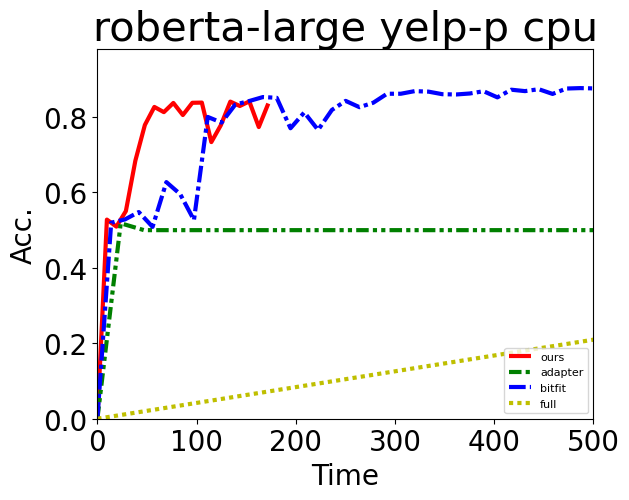

In [2]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np


dataset = "yelp-p"
model = "roberta-large"

logging_file = {
    "ours":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yelp-p/fedFwd_roberta-large_yelp-p_lr0.01_client_num_1000_numerical.log",
    "adapter":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yelp-p/fedsgd_roberta-large_yelp-p_lr0.01_client_num_10_adapter.log",
    "bitfit":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yelp-p/fedsgd_roberta-large_yelp-p_lr0.01_client_num_10_bitfit.log",
    "full":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/roberta-large_yelp-p/fedsgd_roberta-large_yelp-p_lr0.01_client_num_10_full.log"
}

train_time_dict = {"ours":8,"adapter":12,"bitfit":12,"full":20}
local_data_num_dict = {"agnews":15,"yahoo":18,"yelp-p":65}
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 

eval_frequence = 5 if dataset == "yahoo" else 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3

def round_to_time(round,eval_frequence,comm_time,method,local_data_num,adhoc=None):
    train_time = train_time_dict[method]
    if adhoc == None:
        adhoc = [1,1,1]
    else:
        adhoc = list(map(int,adhoc.split(",")))
    time_list = [0]
    if method == "ours":
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    else:
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    time_list.append(time)
    for i in range(2,round):
        v_num = adhoc[i-1] if i-1 < len(adhoc) else adhoc[-1]
        if method == "ours":
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        else:
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        time_list.append(time)
    return time_list
    

for i,method in enumerate(logging_file):
    file = logging_file[method]
    local_data_num = local_data_num_dict[dataset]
    with open(file) as f:
        for line in f:
            if "Trainable" in line:
                param_num = int(line[line.rfind(":")+2:-2])
                print(f"param_num: {param_num}")
                break
        comm_time = param_num * 4 / comm_bandwidth
        acc = [0]
        if "," in file:
            adhoc = file.split("_")[-1].split(".")[0]
        else:
            adhoc = None
        for line in f:
            if "'acc':" in line:
                acc.append(float(line[line.rfind("'acc':")+7:line.rfind(",")]))
        print(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc))
        plt.plot(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc), acc, linestyle=linestyle[i], color=colors[i],label=method,linewidth=lw)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,500)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"{model} {dataset} cpu",fontsize=30)
plt.show()